/opt/anaconda3/envs/csen140/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Selected features:
Index(['Big_Nose', 'Heavy_Makeup', 'Male', 'Young'], dtype='object')

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.51      0.62     29734
           1       0.65      0.87      0.75     31046

    accuracy                           0.70     60780
   macro avg       0.72      0.69      0.68     60780
weighted avg       0.72      0.70      0.68     60780



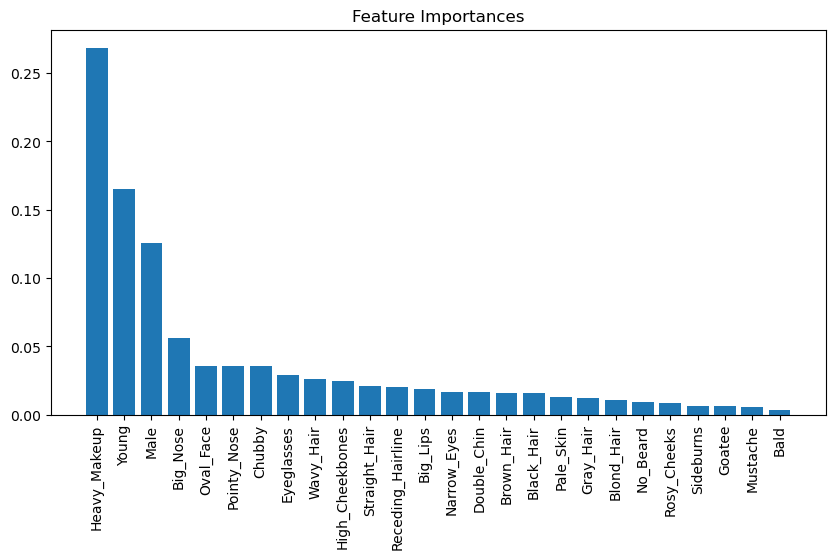

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score

# Load and preprocess the dataset
celeb_data = pd.read_csv('../list_attr_celeba.csv')

# Replace -1 with 0
celeb_data.replace(-1, 0, inplace=True)

# Drop unnecessary columns
celeb_data.drop(columns=[
    'image_id', '5_o_Clock_Shadow', 'Arched_Eyebrows', 'Bags_Under_Eyes', 
    'Bushy_Eyebrows', 'Bangs', 'Blurry', 'Smiling', 'Mouth_Slightly_Open', 
    'Wearing_Earrings', 'Wearing_Hat', 'Wearing_Lipstick', 'Wearing_Necklace', 
    'Wearing_Necktie'
], inplace=True)

# Define features (X) and target (y)
X = celeb_data.drop("Attractive", axis=1)
y = celeb_data["Attractive"]

# Train ExtraTreesClassifier to compute feature importances
clf = ExtraTreesClassifier(n_estimators=50, random_state=42)
clf.fit(X, y)

# Feature importances
importances = clf.feature_importances_

# Select important features using SelectFromModel
model = SelectFromModel(clf, prefit=True)
X_selected = model.transform(X)  # Transform the dataset to keep only selected features

# Map selected features
selected_features = X.columns[model.get_support()]
print("Selected features:")
print(selected_features)

# Create a DataFrame of the transformed dataset
X_selected_df = pd.DataFrame(X_selected, columns=selected_features)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected_df, y, test_size=0.3, random_state=42)

# Train KNN model on selected features
knn = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors
knn.fit(X_train, y_train)

# Make predictions
y_pred = knn.predict(X_test)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Plot feature importances
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(10, 5))
plt.title("Feature Importances")
plt.bar(range(len(importances)), importances[indices])
plt.xticks(range(len(importances)), X.columns[indices], rotation=90)
plt.show()

In [4]:
# accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.6f}")

# precision
precision = precision_score(y_test, y_pred)
print(f"Precision: {precision:.6f}")

# recall
recall = recall_score(y_test, y_pred)
print(f"Recall: {recall:.6f}")

# F1 score
f1 = f1_score(y_test, y_pred)
print(f"F1 Score: {f1:.6f}")

Accuracy: 0.695558
Precision: 0.650391
Recall: 0.873542
F1 Score: 0.745629
